# Task 5: Exploratory Data Analysis
## Dataset: Indian Premier League
## Author: Noha Ihab

The goal of this task is to gain insights on this dataset including:
<li>What are the most successful teams?</li>
<li>Who are the most successful players?</li>
<li>What are the factors contributing to the win or loss of a team?</li>
<li>Suggest teams or players a company should endorse for its products</li>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


through googling, the following description for each column in the dataset was found:
<li>id: The IPL match id.</li>
<li>season: The IPL season</li>
<li>city: The city where the IPL match was held.</li>
<li>date: The date on which the match was held.</li>
<li>team1: One of the teams of the IPL match</li>
<li>team2: The other team of the IPL match</li>
<li>toss_winner: The team that won the toss</li>
<li>toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’</li>
<li>result: The result(‘normal’, ‘tie’, ‘no result’) of the match.</li>
<li>dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.</li>
<li>winner: The winner of the match.</li>
<li>win_by_runs: Provides the runs by which the team batting first won</li>
<li>win_by_wickets: Provides the number of wickets by which the team batting second won.</li>
<li>player_of_match: The outstanding player of the match.</li>
<li>venue: The venue where the match was hosted.</li>
<li>umpire1: One of the two on-field umpires who officiate the match.</li>
<li>umpire2: One of the two on-field umpires who officiate the match.</li>
<li>umpire3: The off-field umpire who officiates the match</li>

In [4]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

The umpire3 column contains too many nulls, this will not be used for our analysis anyway so we will drop it.

In [6]:
df.drop(['umpire3'],axis=1,inplace=True)

In [7]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

How many teams is there in the dataset?

In [8]:
df['team1'].nunique()

15

What are those teams?

In [9]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### we notice that the team Rising Pune Supergiant is repeated twice only with an extra s, so it needs to be renamed in all columns

In [10]:
df.loc[df['team1']=='Rising Pune Supergiants','team1']='Rising Pune Supergiant'
df.loc[df['team2']=='Rising Pune Supergiants','team2']='Rising Pune Supergiant'
df.loc[df['winner']=='Rising Pune Supergiants','winner']='Rising Pune Supergiant'
df.loc[df['toss_winner']=='Rising Pune Supergiants','toss_winner']='Rising Pune Supergiant'

### Through domain research, it is found that Delhi Daredevils is the same team as Delhi Capitals, only they changed their name. hence, they should be the same in the dataset.

In [11]:
df.loc[df['team1']=='Delhi Daredevils','team1']='Delhi Capitals'
df.loc[df['team2']=='Delhi Daredevils','team2']='Delhi Capitals'
df.loc[df['winner']=='Delhi Daredevils','winner']='Delhi Capitals'
df.loc[df['toss_winner']=='Delhi Daredevils','toss_winner']='Delhi Capitals'

## What are the most successful teams?

In [12]:
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

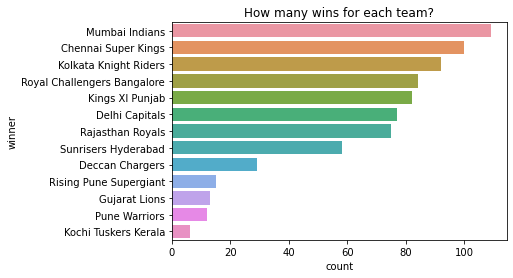

In [13]:
sns.countplot(y='winner', data=df, order = df['winner'].value_counts().index)
plt.title('How many wins for each team?');

however, this might not be fair since not all teams played the same number of matches. Let's calculate the winning probability instead. To do this, we need to use the provided deliveries.csv file.

In [14]:
df_del=pd.read_csv('deliveries.csv')

In [15]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [16]:
df_del.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [17]:
df_del['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
df_del.loc[df_del['batting_team']=='Rising Pune Supergiants','batting_team']='Rising Pune Supergiant'
df_del.loc[df_del['bowling_team']=='Rising Pune Supergiants','bowling_team']='Rising Pune Supergiant'
df_del.loc[df_del['batting_team']=='Delhi Daredevils','batting_team']='Delhi Capitals'
df_del.loc[df_del['bowling_team']=='Delhi Daredevils','bowling_team']='Delhi Capitals'

In [19]:
df_del['batting_team'].unique() #fixed!

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [20]:
team_matches_count=df_del.groupby('batting_team')['match_id'].nunique()
team_matches_count

batting_team
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   45
Rajasthan Royals               146
Rising Pune Supergiant          30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: match_id, dtype: int64

In [21]:
team_wins=df['winner'].value_counts()
team_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [22]:
win_ratio=team_wins/team_matches_count
win_ratio=pd.DataFrame(win_ratio.reset_index())
win_ratio.columns=['team','ratio']

In [23]:
win_ratio=win_ratio.sort_values('ratio', ascending=False)

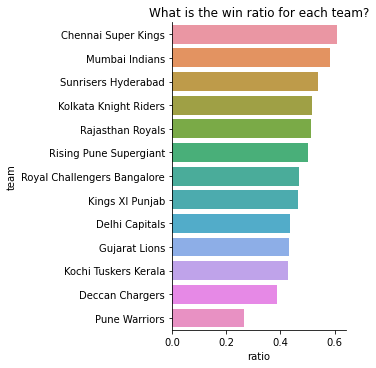

In [24]:
#now plot the wins ratio for each team
sns.catplot(data=win_ratio, y='team', x='ratio', kind='bar')
plt.title('What is the win ratio for each team?');

This concludes that Chennai Super Kings and Mumbai Indians are the top 2 teams with highest winning probability.

## Who are the most successful players?

### First let's see how many players do we have that once won player of the match?

In [25]:
df['player_of_match'].unique().shape[0]

227

### With 227 players, Considering the top 10 players most successful would be reasonable

In [26]:
print('Top 10 Winner of the match Players')
df['player_of_match'].value_counts()[:10]

Top 10 Winner of the match Players


CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

Let's also import the deliveries dataset to get an insight on the best players in more detail

In [27]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [28]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [29]:
df_del['player_dismissed'].isnull().sum()

170244

In [30]:
top10_runs=df_del.groupby('batsman')['batsman_runs'].sum().nlargest(10)

In [31]:
max(top10_runs)

5434

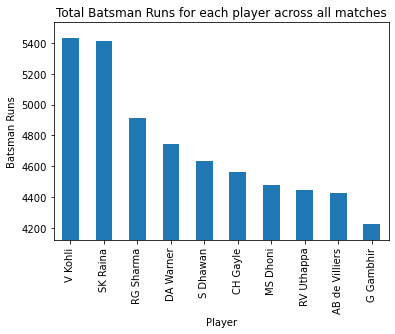

In [32]:
top10_runs.plot(kind='bar');
plt.ylabel('Batsman Runs')
plt.xlabel('Player')
plt.ylim(min(top10_runs)-100,max(top10_runs)+100)
plt.title('Total Batsman Runs for each player across all matches');

### we can see that there are many common players in the top runs and winner of the match, however not in the same order

## What are the factors contributing to the win or loss of a team?

In [33]:
#merge the two dataframes to get insights on winning and losing teams
merge_df=pd.merge(df_del,df,left_on='match_id',right_on='id')
merge_df.drop('id',axis=1,inplace=True)
merge_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [34]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [35]:
merge_df['match_id'].nunique()

756

## Does the toss affect the winning team?

In [36]:
#calculate the total number of matches
num_matches=df['id'].nunique()

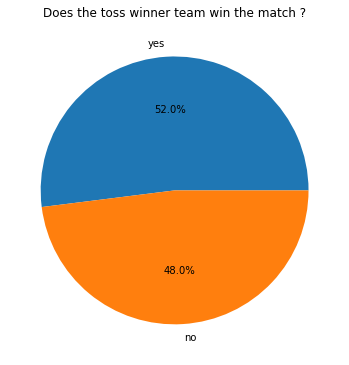

In [37]:
#get the count of wins where the winner of the match team won the toss
plt.figure(figsize=(6,8))
win_toss=len(df[df['winner']==df['toss_winner']])
plt.pie([win_toss,num_matches-win_toss], labels=['yes','no'], autopct='%1.1f%%')
plt.title('Does the toss winner team win the match ?');

### this shows that the toss win has a very small effect on the match winner